In [2]:
!pip install yfinance
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas_datareader.data import DataReader
from datetime import datetime
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Input
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
gazp = yf.Ticker("^GSPC")
gazphist = gazp.history('5Y')


In [4]:
sp500 = yf.Ticker("^GSPC")

In [5]:
import random
sentiment = [random.uniform(-1,1) for i in range(len(gazphist))]
gazphist = gazphist.assign(Sentiment=sentiment)
gazphist = gazphist.drop(columns=["Dividends","Stock Splits"])

In [6]:
gazphist

,Open,High,Low,Close,Volume,Sentiment
Date,,,,,,
2017-08-02,2480.379883,2480.379883,2466.479980,2477.570068,3478580000,-0.729000
2017-08-03,2476.030029,2476.030029,2468.850098,2472.159912,3645020000,-0.737549
2017-08-04,2476.879883,2480.000000,2472.080078,2476.830078,3235140000,-0.025889
2017-08-07,2477.139893,2480.949951,2475.879883,2480.909912,2931780000,0.042445
2017-08-08,2478.350098,2490.870117,2470.320068,2474.919922,3344640000,0.367118
...,...,...,...,...,...,...
2022-07-27,3951.429932,4039.560059,3951.429932,4023.610107,3584170000,-0.302446
2022-07-28,4026.129883,4078.949951,3992.969971,4072.429932,3882850000,-0.254568
2022-07-29,4087.330078,4140.149902,4079.219971,4130.290039,3817740000,-0.090988


In [7]:
x = gazphist.index
y = gazphist.Close

<function matplotlib.pyplot.show>

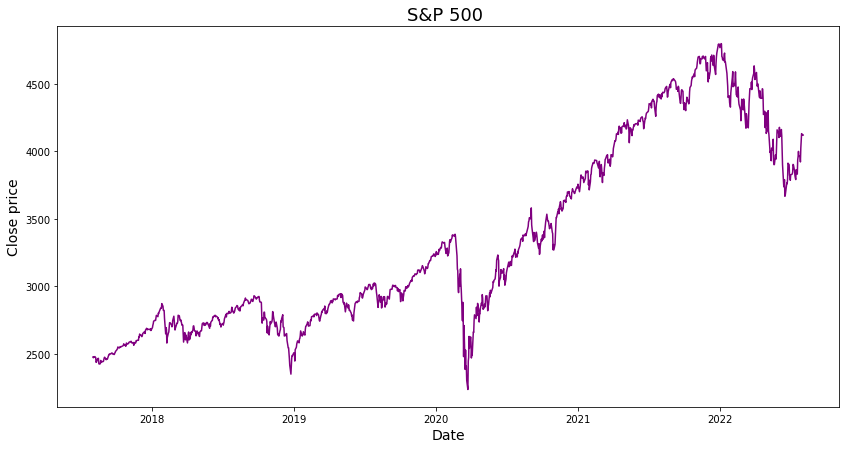

In [8]:
plt.figure(figsize=(14, 7))
plt.plot(x,y, color="Purple")
plt.title('S&P 500 ',fontsize=18)
plt.xlabel("Date",fontsize=14)
plt.ylabel("Close price",fontsize=14)
plt.show

нужно правильно сделать выборку чтобы тестовая цена закрытия вычислялась на основе пяти предыдущих дней

In [9]:
dataset = sp500.values
training_data_len = int(np.ceil( len(dataset) * .8 ))
train_data = dataset[0:int(training_data_len), :]
x_train = train_data[0:training_data_len-6]
y_train = train_data[5:training_data_len-1,3]
x_train, y_train = np.array(x_train), np.array(y_train)
test_data = dataset[training_data_len:]
x_test = test_data[0:len(test_data)-6]
y_test = test_data[5:len(test_data)-1,3]
x_test = np.array(x_test)
scaler_x = MinMaxScaler(feature_range=(0,1))
scaler_y = MinMaxScaler(feature_range=(0,1))
x_train = scaler_x.fit_transform(x_train)
x_test = scaler_x.transform(x_test)
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test = scaler_y.transform(y_test.reshape(-1, 1))
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

AttributeError: ignored

In [ ]:
dataset = gazphist.values
training_data_len = int(np.ceil( len(dataset) * .8 ))
training_data_len

1008

In [ ]:
train_data = dataset[0:int(training_data_len), :]
x_train = train_data[0:training_data_len-6]
y_train = train_data[5:training_data_len-1,3]
x_train, y_train = np.array(x_train), np.array(y_train)
#x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) 

In [ ]:
test_data = dataset[training_data_len:]
x_test = test_data[0:len(test_data)-6]
y_test = test_data[5:len(test_data)-1,3]
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
#x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
len(test_data)

252

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler(feature_range=(0,1))
scaler_y = MinMaxScaler(feature_range=(0,1))
x_train = scaler_x.fit_transform(x_train)
x_test = scaler_x.transform(x_test)
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test = scaler_y.transform(y_test.reshape(-1, 1))
#scaled_data = scaler.fit_transform(dataset)


In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
x_train 

array([[[0.06242837],
        [0.05911807],
        [0.10825554],
        [0.08796611],
        [0.22217794],
        [0.61313205]],

       [[0.06447213],
        [0.05949487],
        [0.10534983],
        [0.08740985],
        [0.37517567],
        [0.26165596]],

       [[0.06448247],
        [0.06675755],
        [0.11030059],
        [0.09656182],
        [0.29838606],
        [0.93803241]],

       ...,

       [[0.96782063],
        [0.96444031],
        [0.96235911],
        [0.94748897],
        [0.26373594],
        [0.27657657]],

       [[0.93298866],
        [0.93748555],
        [0.93022608],
        [0.9413994 ],
        [0.25508478],
        [0.23879116]],

       [[0.94512752],
        [0.96632432],
        [0.96035888],
        [0.96317163],
        [0.20072482],
        [0.73209321]]])

In [ ]:
model_lstm = Sequential()
model_lstm.add(LSTM(64, return_sequences=True, input_shape= (6,5)))
model_lstm.add(LSTM(32, return_sequences= False))
model_lstm.add(Dense(256))
model_lstm.add(Dropout(0.3))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')
history = model_lstm.fit(x_train, y_train, batch_size=128, epochs = 20)

In [ ]:
#Build the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(64, return_sequences=True, input_shape= (x_train.shape[1], 1)))
#model_lstm.add(LSTM(64, return_sequences=True, input_shape= (6,5)))
model_lstm.add(LSTM(32, return_sequences= False))
model_lstm.add(Dense(128))
model_lstm.add(Dropout(0.5))
model_lstm.add(Dense(1))

# Compile the model
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
history = model_lstm.fit(x_train, y_train, batch_size=100, epochs = 20)

Epoch 1/20
11/11 [==============================] - 7s 19ms/step - loss: 0.1049
Epoch 2/20
11/11 [==============================] - 0s 18ms/step - loss: 0.0326
Epoch 3/20
11/11 [==============================] - 0s 14ms/step - loss: 0.0251
Epoch 4/20
11/11 [==============================] - 0s 19ms/step - loss: 0.0147
Epoch 5/20
11/11 [==============================] - 0s 15ms/step - loss: 0.0083
Epoch 6/20
11/11 [==============================] - 0s 17ms/step - loss: 0.0053
Epoch 7/20
11/11 [==============================] - 0s 15ms/step - loss: 0.0057
Epoch 8/20
11/11 [==============================] - 0s 19ms/step - loss: 0.0054
Epoch 9/20
11/11 [==============================] - 0s 17ms/step - loss: 0.0048
Epoch 10/20
11/11 [==============================] - 0s 19ms/step - loss: 0.0049
Epoch 11/20
11/11 [==============================] - 0s 18ms/step - loss: 0.0045
Epoch 12/20
11/11 [==============================] - 0s 21ms/step - loss: 0.0049
Epoch 13/20
11/11 [==================

Text(0.5, 1.0, 'model loss')

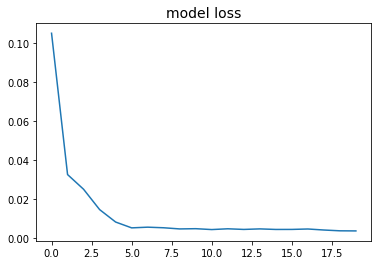

In [ ]:
plt.plot(history.history['loss'])
plt.title('model loss',fontsize=14)

In [ ]:
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 6, 64)             16896     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 128)               4224      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 33,665
Trainable params: 33,665
Non-trainable params: 0
_________________________________________________________________


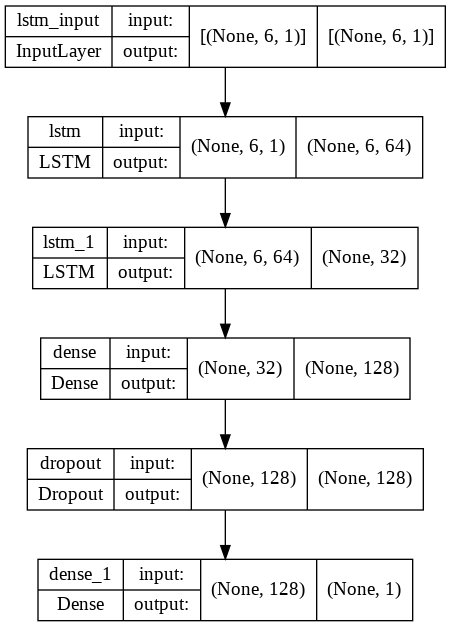

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_lstm, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Get the LSTM model predicted price values 
predictions_lstm = model_lstm.predict(x_test)
#predictions_lstm = scaler_y.inverse_transform(predictions_lstm)
#y_test = scaler_y.inverse_transform(y_test)

In [ ]:
predictions_lstm = model_lstm.predict(x_test)
mse_lstm = metrics.mean_squared_error(y_test, predictions_lstm)
print("LSTM Model MSE: ", mse_lstm)
rmse_lstm = np.sqrt(mse_lstm)
print("LSTM Model RMSE: ",rmse_lstm)
r2_lstm = metrics.r2_score(y_test, predictions_lstm)
print("LSTM Model r2: ",r2_lstm)
mae_lstm = metrics.mean_absolute_error(y_test, predictions_lstm)
print("LSTM Model MAE: ", mae_lstm)

In [ ]:
# Get the root mean squared error (RMSE)
mse_lstm = metrics.mean_squared_error(y_test, predictions_lstm)
rmse_lstm = np.sqrt(mse_lstm)
print("LSTM Model MSE: ", mse_lstm)
print("LSTM Model RMSE: ",rmse_lstm)
# Get r2 score
r2_lstm = metrics.r2_score(y_test, predictions_lstm)

print("LSTM Model r2: ",r2_lstm)
mae_lstm = metrics.mean_absolute_error(y_test, predictions_lstm)
print("LSTM Model MAE: ", mae_lstm)

LSTM Model MSE:  0.003082551778197037
LSTM Model RMSE:  0.05552073286797498
LSTM Model r2:  0.661444154852282
LSTM Model MAE:  0.044067347241728394


In [ ]:
train = sp500[:training_data_len]
valid = sp500[training_data_len:training_data_len+len(test_data)-6]
valid['Predictions_LSTM'] = scaler_y.inverse_transform(predictions_lstm)
plt.figure(figsize=(10,5))
plt.title('S&P 500')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions_LSTM']])
plt.legend(['Train', 'Actual_results', 'Predictions_LSTM'], loc='lower right')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


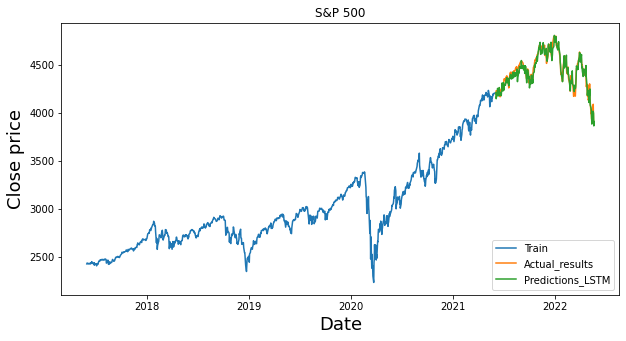

In [ ]:
# Plot the data
train = gazphist[:training_data_len]
valid = gazphist[training_data_len:training_data_len+len(test_data)-6]
valid['Predictions_LSTM'] = scaler_y.inverse_transform(predictions_lstm)
# Visualize the data
plt.figure(figsize=(10,5))
plt.title('S&P 500')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions_LSTM']])
plt.legend(['Train', 'Actual_results', 'Predictions_LSTM'], loc='lower right')
#plt.legend(['Actual results', 'Predictions'], loc='upper right')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100,random_state=42, max_depth=8,criterion="squared_error")
regressor.fit(x_train, y_train) 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(max_depth=8, random_state=42)

In [ ]:
random_forest_predictions = regressor.predict(x_test)
#random_forest_predictions = scaler_y.inverse_transform(random_forest_predictions.reshape(-1, 1))
#y_test = scaler_y.inverse_transform(y_test)

In [ ]:
mse_random_forest = metrics.mean_squared_error(y_test, random_forest_predictions)
rmse_random_forest = np.sqrt(mse_random_forest)
print("random forest Model MSE: ", mse_random_forest)
print("random forestModel RMSE: ",rmse_random_forest)
r2_random_forest = metrics.r2_score(y_test, random_forest_predictions)

print("random forest Model r2: ",r2_random_forest)

random forest Model MSE:  0.026230549177716764
random forestModel RMSE:  0.1619584797956463
random forest Model r2:  -1.9772017150534902


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


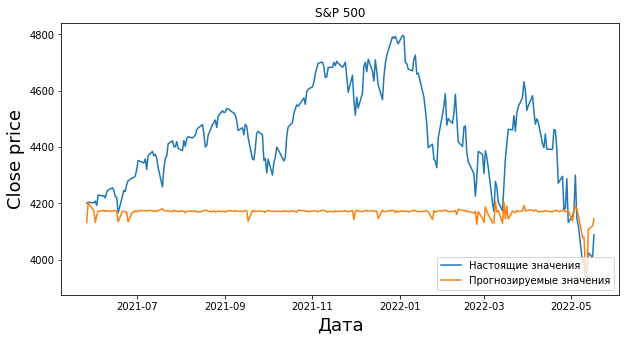

In [ ]:
# Plot the data
train = gazphist[:training_data_len]
valid = gazphist[training_data_len:training_data_len+len(test_data)-6]
valid['Predictions_LSTM'] = random_forest_predictions
# Visualize the data
plt.figure(figsize=(10,5))
plt.title('S&P 500')
plt.xlabel('Дата', fontsize=18)
plt.ylabel('Close price', fontsize=18)
#plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions_LSTM']])
#plt.legend(['Train', 'Actual_results', 'Predictions_LSTM'], loc='lower right')
plt.legend(['Настоящие значения', 'Прогнозируемые значения'], loc='lower right')
plt.show()

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)


LinearRegression()

In [ ]:
LinearRegression_predictions = regr.predict(x_test)

In [ ]:
mse_regr = metrics.mean_squared_error(y_test, LinearRegression_predictions)
rmse_regr = np.sqrt(mse_regr)
print("random forest Model MSE: ", mse_regr)
print("random forestModel RMSE: ",rmse_regr)
r2_regr = metrics.r2_score(y_test, LinearRegression_predictions)

print("random forest Model r2: ",r2_random_forest)

random forest Model MSE:  0.0025867735337834594
random forestModel RMSE:  0.05086033359882197
random forest Model r2:  -1.9772017150534902


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


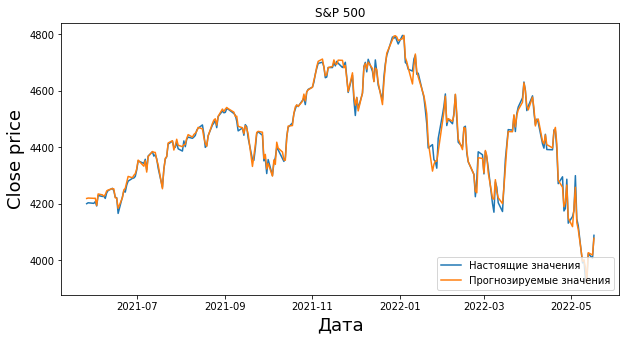

In [ ]:
# Plot the data
train = gazphist[:training_data_len]
valid = gazphist[training_data_len:training_data_len+len(test_data)-6]
valid['Predictions_LSTM'] = scaler_y.inverse_transform(LinearRegression_predictions)
# Visualize the data
plt.figure(figsize=(10,5))
plt.title('S&P 500')
plt.xlabel('Дата', fontsize=18)
plt.ylabel('Close price', fontsize=18)
#plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions_LSTM']])
#plt.legend(['Train', 'Actual_results', 'Predictions_LSTM'], loc='lower right')
plt.legend(['Настоящие значения', 'Прогнозируемые значения'], loc='lower right')
plt.show()